<a href="https://colab.research.google.com/github/hwan2-99/machine_learning_subject/blob/main/CNN_Mnist_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 CNN을 적용한 Mnist 손글씨 인식 모델

seed값 설정 및 데이터 불러오기

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

11490434/11490434 [==============================] - 2s 0us/step


컨볼루션 신경망 설정

In [2]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

def lr_schedule(epoch):
    lr = 0.001
    if epoch > 10:
        lr = 0.0005
    if epoch > 20:
        lr = 0.0001
    return lr

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


모델 최적화 설정

In [3]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = LearningRateScheduler(lr_schedule)

모델의 실행

In [4]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer, lr_scheduler])


Epoch 1: val_loss improved from inf to 0.05537, saving model to ./model/01-0.0554.hdf5

Epoch 2: val_loss improved from 0.05537 to 0.03759, saving model to ./model/02-0.0376.hdf5

Epoch 3: val_loss improved from 0.03759 to 0.03576, saving model to ./model/03-0.0358.hdf5

Epoch 4: val_loss improved from 0.03576 to 0.02990, saving model to ./model/04-0.0299.hdf5

Epoch 5: val_loss did not improve from 0.02990

Epoch 6: val_loss improved from 0.02990 to 0.02946, saving model to ./model/06-0.0295.hdf5

Epoch 7: val_loss improved from 0.02946 to 0.02540, saving model to ./model/07-0.0254.hdf5

Epoch 8: val_loss did not improve from 0.02540

Epoch 9: val_loss did not improve from 0.02540

Epoch 10: val_loss did not improve from 0.02540

Epoch 11: val_loss did not improve from 0.02540

Epoch 12: val_loss did not improve from 0.02540

Epoch 13: val_loss did not improve from 0.02540

Epoch 14: val_loss did not improve from 0.02540

Epoch 15: val_loss did not improve from 0.02540

Epoch 16: val

테스트 정확도 출력

In [5]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0293 - accuracy: 0.9927

 Test Accuracy: 0.9927


인식 정확도 = 99.27%

오차 그래프로 출력

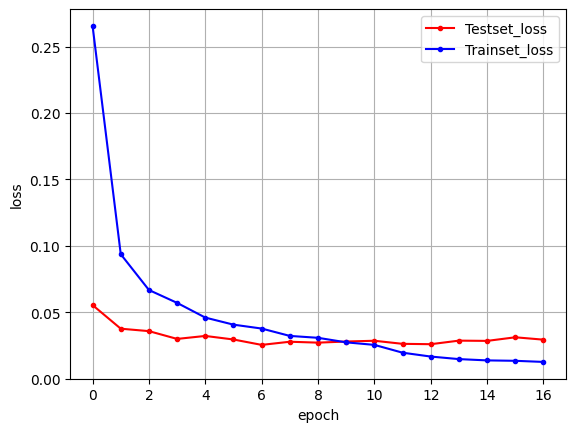

In [6]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()